# Segmentasi Pelanggan Penerbangan Menggunakan Metode Clustering

In [2038]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [2039]:
data = pd.read_csv('flight.csv')
df = data.copy()

## EDA

### Penjelasan Fitur
|Code |Description|
|-----|-----------|
MEMBER_NO | ID Member
FFP_DATE | Frequent Flyer Program Join Date
FIRST_FLIGHT_DATE | Tanggal Penerbangan pertama
GENDER | Jenis Kelamin
FFP_TIER | Tier dari Frequent Flyer Program
WORK_CITY | Kota Asal
WORK_PROVINCE | Provinsi Asal
WORK_COUNTRY | Negara Asal
AGE | Umur Customer
LOAD_TIME | Tanggal data diambil
FLIGHT_COUNT | Jumlah penerbangan Customer
BP_SUM | Rencana Perjalanan
SUM_YR_1 | Fare Revenue
SUM_YR_2 | Votes Prices
SEG_KM_SUM | Total jarak(km) penerbangan yg sudah dilakukan
LAST_FLIGHT_DATE | Tanggal penerbangan terakhir
LAST_TO_END | Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
AVG_INTERVAL | Rata-rata jarak waktu
MAX_INTERVAL | Maksimal jarak waktu
EXCHANGE_COUNT | Jumlah penukaran
avg_discount | Rata rata discount yang didapat customer
Points_Sum | Jumlah poin yang didapat customer
Point_NotFlight | point yang tidak digunakan oleh members

In [2040]:
df.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


### Univariate Analysis

In [2041]:
cat = ['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY']
num = ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']
date = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']

#### Categorical

In [2042]:
desc = df[cat].describe().T
desc['ratio'] = desc['freq'] / desc ['count']
desc

,count,unique,top,freq,ratio
GENDER,62985,2,Male,48134,0.764214
WORK_CITY,60719,3234,guangzhou,9386,0.154581
WORK_PROVINCE,59740,1165,guangdong,17509,0.293087
WORK_COUNTRY,62962,118,CN,57748,0.917188


#### Numerical

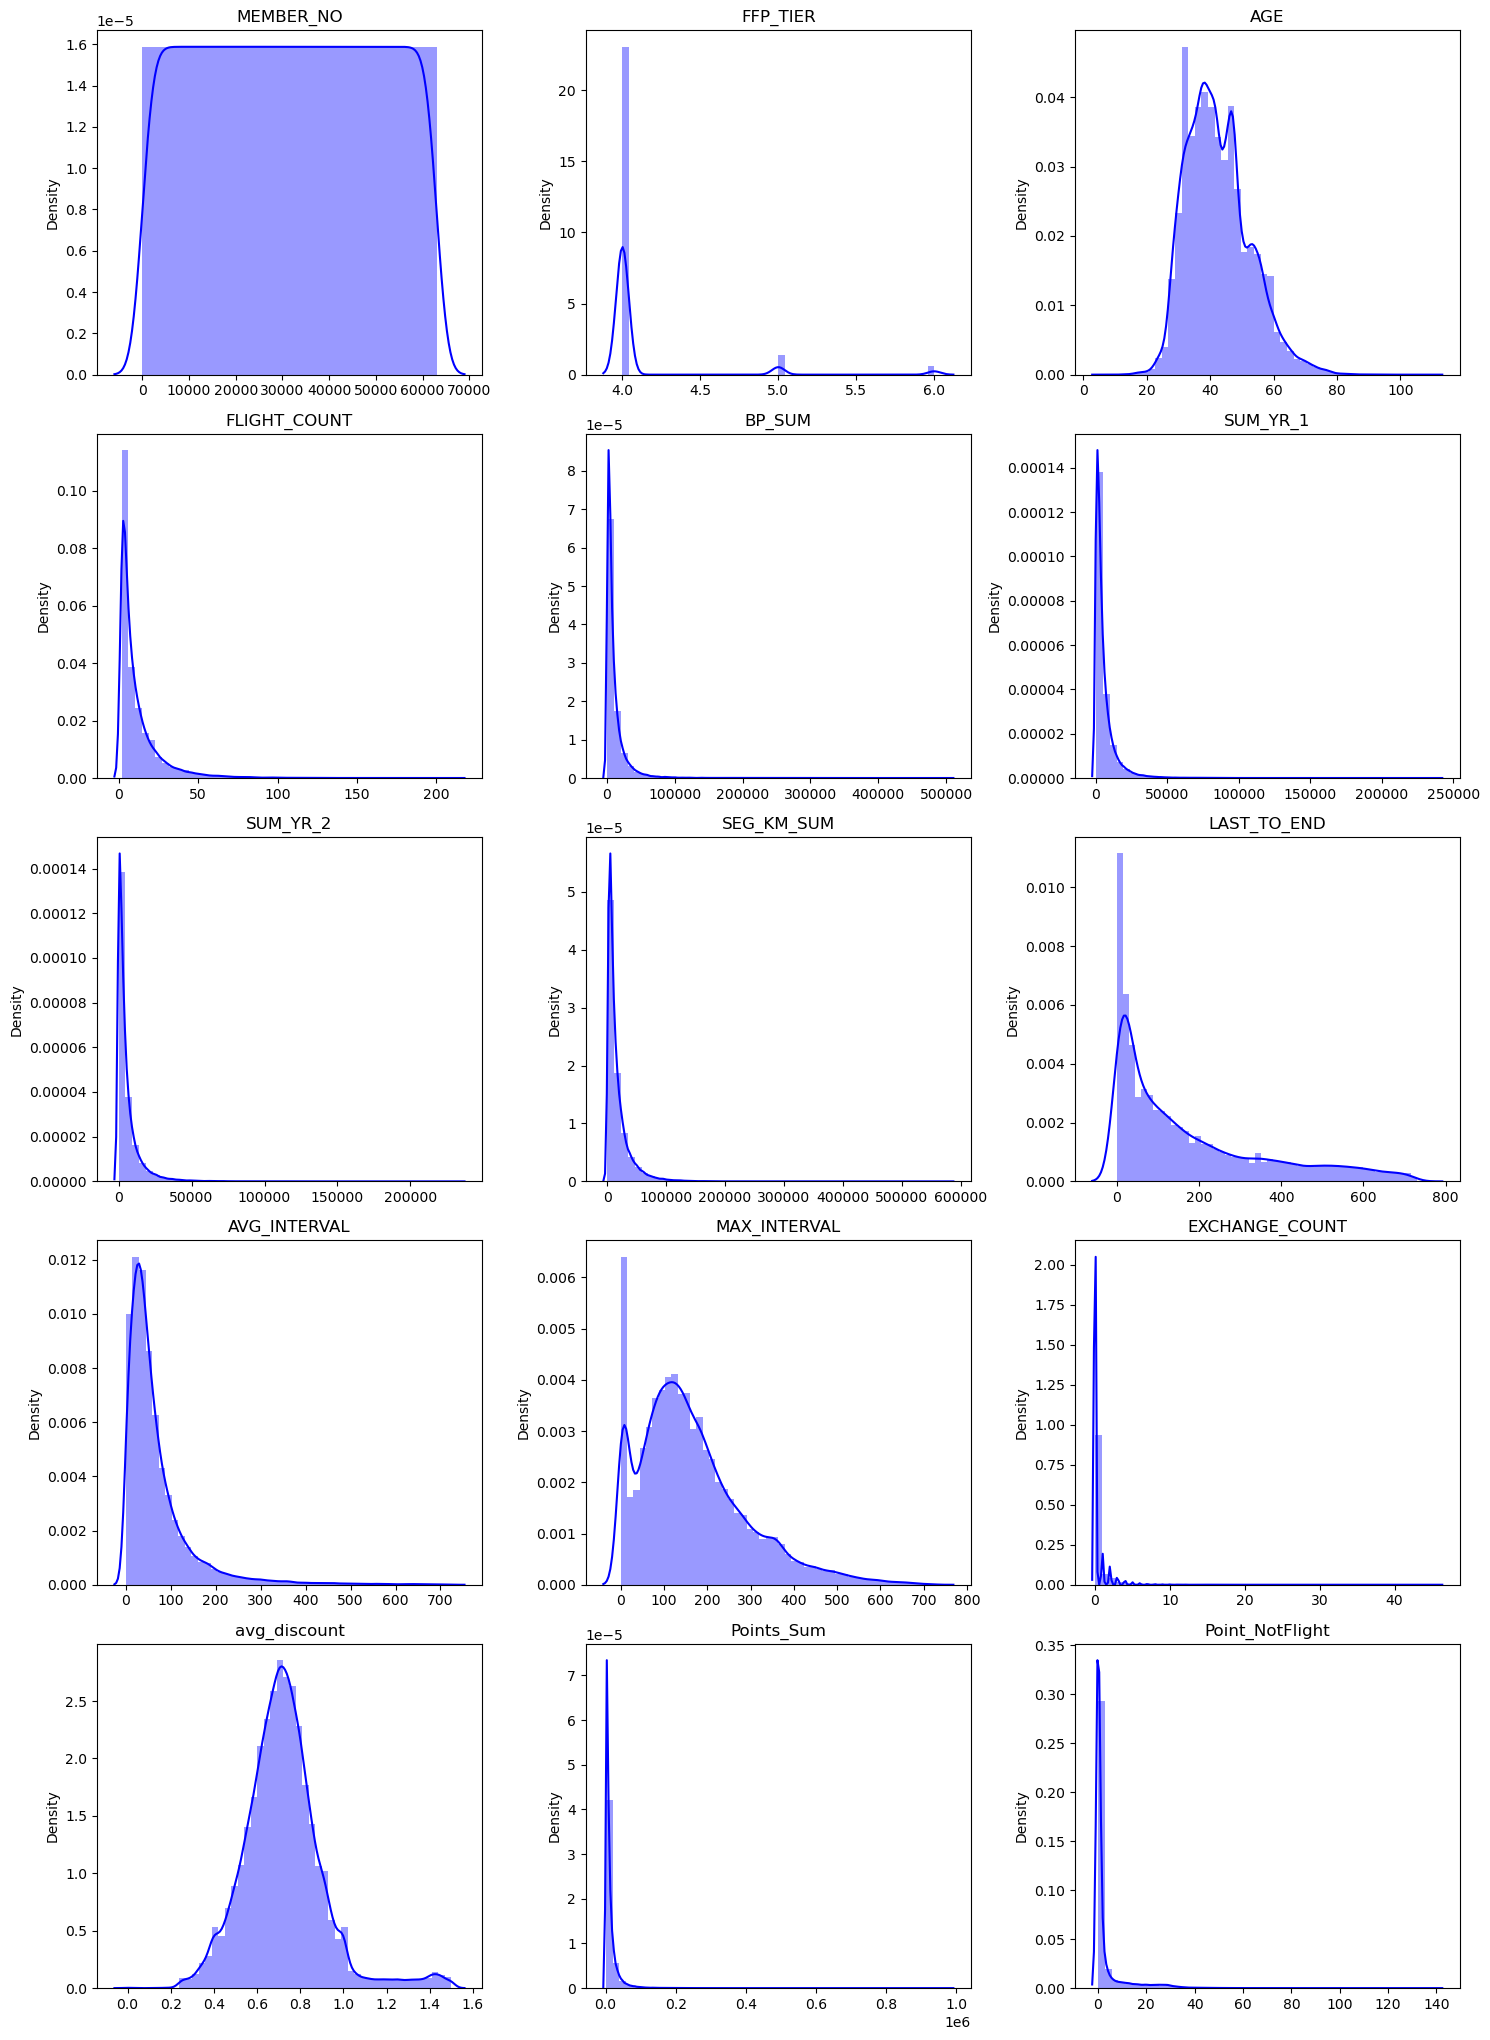

In [2043]:
plt.figure(figsize=(15, 20.5))
for x in range(0, len(num)):
    plt.subplot(5, 3, x+1)
    sns.distplot(df[num[x]], color='b')
    plt.title(num[x], fontsize=12)
    plt.xlabel('')
    plt.tight_layout()


In [2044]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


#### Datetime

In [2045]:
df[date].describe().T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


### Multivariate Analysis

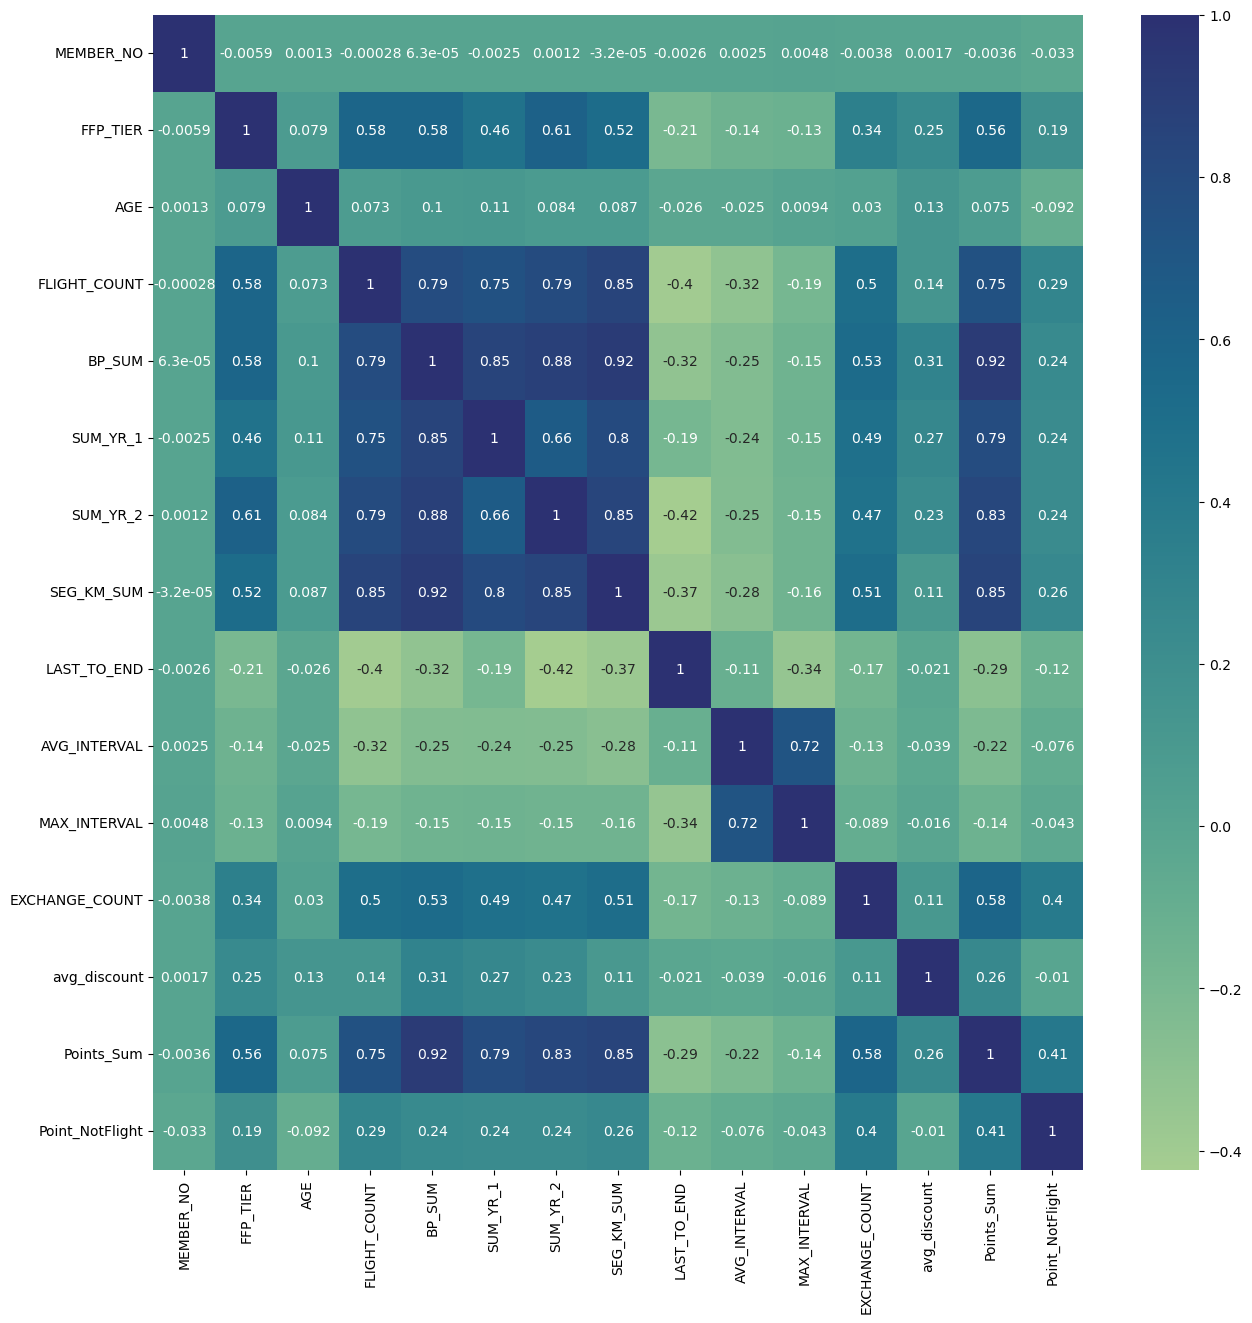

In [2046]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='crest', annot=True)
plt.show()

In [2047]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [2048]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_features = df.select_dtypes(include=['object']).columns
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)
for i in range(len(categorical_features)):
    for j in range(len(categorical_features)):
        feature1 = categorical_features[i]
        feature2 = categorical_features[j]
        cramers_v_matrix.loc[feature1, feature2] = cramers_v(data[feature1], data[feature2])

In [2049]:
cramers_v_matrix

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
FFP_DATE,1.0,0.398042,0.07772,0.0,0.0,0.0,NaN,0.0
FIRST_FLIGHT_DATE,0.398042,1.0,0.098845,0.0,0.0,0.0,NaN,0.0
GENDER,0.07772,0.098845,0.999956,0.064275,0.090859,0.053142,NaN,0.111159
WORK_CITY,0.0,0.0,0.064275,1.0,0.833787,0.853858,NaN,0.12166
WORK_PROVINCE,0.0,0.0,0.090859,0.833787,1.0,0.826162,NaN,0.081605
WORK_COUNTRY,0.0,0.0,0.053142,0.853858,0.826162,1.0,NaN,0.076778
LOAD_TIME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LAST_FLIGHT_DATE,0.0,0.0,0.111159,0.12166,0.081605,0.076778,NaN,1.0


## Preprocessing

In [2050]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

### Cek Tipe data

In [2051]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])

In [2052]:
df = df.drop(df[df['LAST_FLIGHT_DATE'].str.contains('2014/2/29')].index)
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])

### Features Selection

In [2053]:
df = df[['LAST_TO_END','FLIGHT_COUNT','avg_discount']]
col = df.columns

### Missing values & duplicate

In [2054]:
df.isna().sum()

LAST_TO_END     0
FLIGHT_COUNT    0
avg_discount    0
dtype: int64

In [2055]:
df = df.dropna()

In [2056]:
df.duplicated().sum()

1104

In [2057]:
df.drop_duplicates(inplace = True)

### Outlier Treatment

In [2058]:
fil_ent = np.array([True] * len(df))
for q in df.columns:
    Q1 = df[q].quantile(0.25)
    Q3 = df[q].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((df[q] >= low_limit) & (df[q] <= high_limit)) & fil_ent
    
df = df[fil_ent]

print('Jumlah baris setelah memfilter outlier', len(df))

Jumlah baris setelah memfilter outlier 52924


### Standardization

In [2060]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns = col)

## Modeling

### PCA

In [2061]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)
pcs = pca.transform(df)
df_pca = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2'])


### Silhouette Score

In [2062]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,6))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42).fit(df)
    preds = kmeans.predict(df)
    
    score_euclidean = silhouette_score(df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)
    
n = (arr_silhouette_score_euclidean.index(max(arr_silhouette_score_euclidean)) + 2)

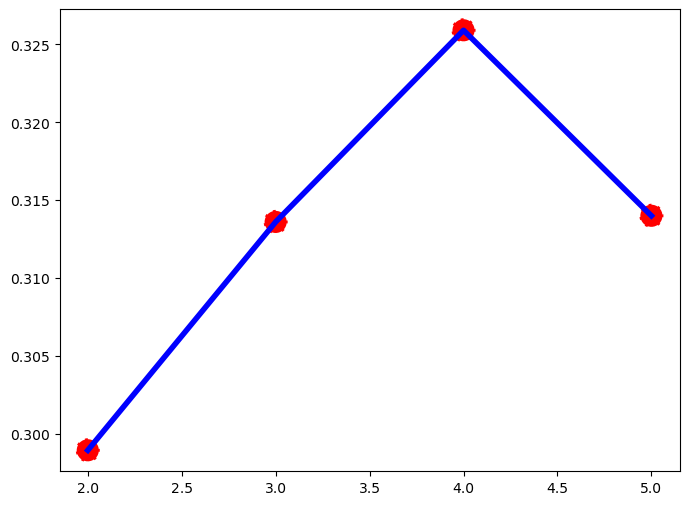

In [2063]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,6), y=arr_silhouette_score_euclidean, color='b', linewidth = 4)
sns.scatterplot(x=range(2,6), y=arr_silhouette_score_euclidean, s=300, color='r',  linestyle='--')
plt.show()

### KMeans Clustering

In [2064]:
kmeans = KMeans(n_clusters=n, random_state=42)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_

In [2065]:
df.groupby('Cluster').agg(['mean','median','std'])

LAST_TO_END                     FLIGHT_COUNT                      \
               mean    median       std         mean    median       std   
Cluster                                                                    
0         -0.699040 -0.849952  0.395759     1.647086  1.588072  0.722586   
1         -0.292989 -0.401240  0.586192    -0.381915 -0.436470  0.494260   
2         -0.311877 -0.388600  0.534170    -0.317876 -0.436470  0.500749   
3          1.707437  1.671687  0.588364    -0.662595 -0.841379  0.393379   

        avg_discount                      
                mean    median       std  
Cluster                                   
0           0.155249  0.113619  0.691720  
1          -0.975115 -0.864775  0.617965  
2           0.776434  0.661690  0.624358  
3           0.079954  0.093849  1.012876

In [2066]:
kmeans = KMeans(n_clusters=n, random_state=42)
kmeans.fit(df_pca)
df_pca['Cluster'] = kmeans.labels_

In [2067]:
df_pca.groupby('Cluster').agg(['mean','median','std'])

PC1                           PC2                    
             mean    median       std      mean    median       std
Cluster                                                            
0        0.159186  0.153952  0.453803  0.579486  0.470553  0.625485
1        1.621697  1.521407  0.603204 -0.024626 -0.070266  0.675144
2       -0.458842 -0.342660  0.742433 -1.079155 -0.998544  0.573086
3       -1.530957 -1.512717  0.552842  0.828108  0.754680  0.820707

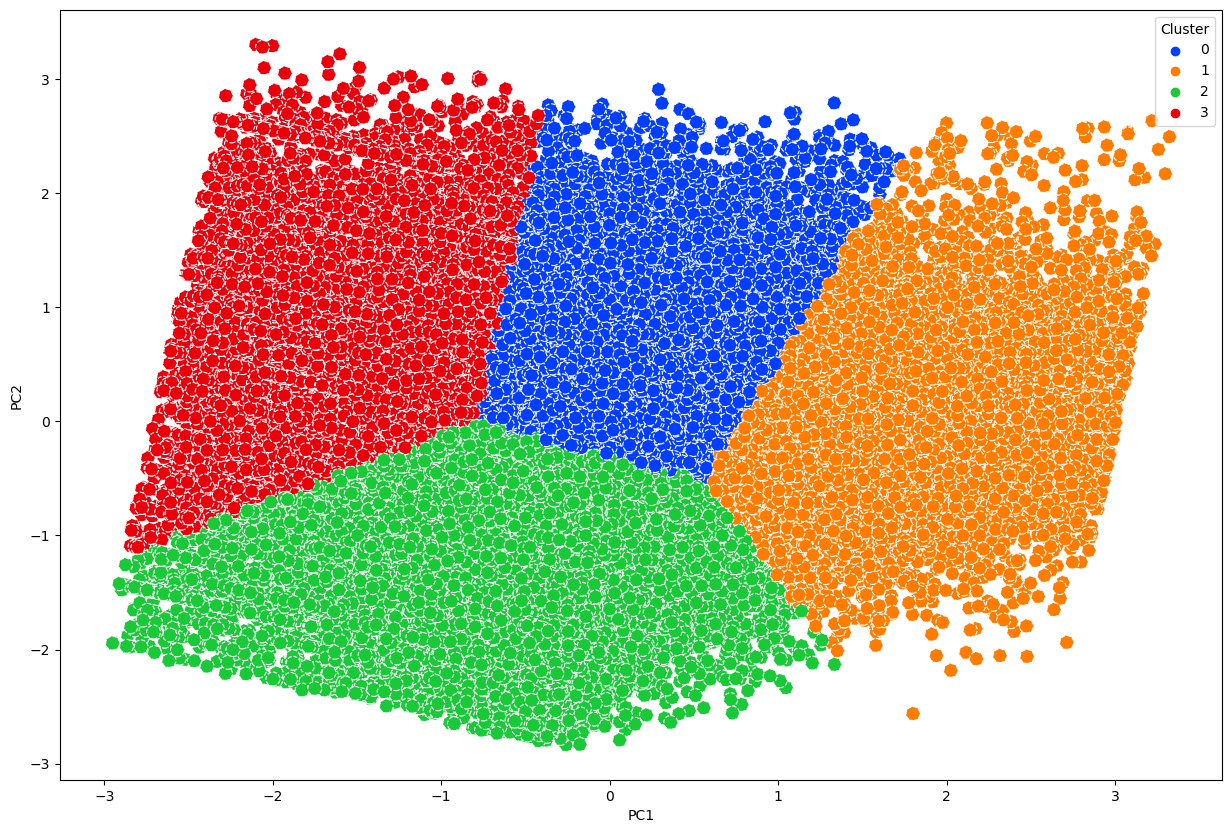

In [2068]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='PC1', y='PC2',hue='Cluster',palette = 'bright', linestyle= '--', s=100,data=df_pca,ax=ax)
plt.show()

In [2073]:
x = scaler.inverse_transform(df[['LAST_TO_END','FLIGHT_COUNT','avg_discount']])
x = pd.DataFrame(x, columns = ['LAST_TO_END','FLIGHT_COUNT','avg_discount'])
x['Cluster'] = df['Cluster']
x.groupby('Cluster').agg(['mean'])

,LAST_TO_END,FLIGHT_COUNT,avg_discount
,mean,mean,mean
Cluster,,,
0,53.879000,21.437241,0.721297
1,118.128559,6.404206,0.559347
2,115.139822,6.878679,0.810295
3,434.656773,4.324626,0.710509
